In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
np.random.seed(42)
num_samples = 100

In [3]:
study_hours = np.random.uniform(1, 10, num_samples)
practice_problems = np.random.uniform(0, 100, num_samples)

In [4]:
pass_fail = (study_hours * 0.5 + practice_problems * 0.05 + np.random.normal(0, 0.5, num_samples)) > 4
y = pass_fail.astype(int)

In [6]:
data = pd.DataFrame({
    'Study Hours': study_hours,
    'Practice Problems': practice_problems,
    'Pass/Fail': y
})

print("Dataset Sample:\n", data.head())
print("\nStats : \n",data.describe())

Dataset Sample:
    Study Hours  Practice Problems  Pass/Fail
0     4.370861           3.142919          0
1     9.556429          63.641041          1
2     7.587945          31.435598          1
3     6.387926          50.857069          1
4     2.404168          90.756647          1

Stats : 
        Study Hours  Practice Problems   Pass/Fail
count   100.000000         100.000000  100.000000
mean      5.231627          49.783172    0.680000
std       2.677405          29.311125    0.468826
min       1.049699           0.695213    0.000000
25%       2.738807          24.200453    0.000000
50%       5.177282          50.562486    1.000000
75%       7.571828          76.618360    1.000000
max       9.881982          98.565045    1.000000


In [7]:
X = data[['Study Hours', 'Practice Problems']]
y = data['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [12]:
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.0
Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [22]:
new_inputs = pd.DataFrame({
    'Study Hours': [6, 8, 2],
    'Practice Problems': [50, 20, 80]
})
new_predictions = model.predict(new_inputs)

print("New Inputs Predictions:\n", new_inputs)
print("Predicted Pass/Fail:\n", new_predictions)

New Inputs Predictions:
    Study Hours  Practice Problems
0            6                 50
1            8                 20
2            2                 80
Predicted Pass/Fail:
 [1 1 1]


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

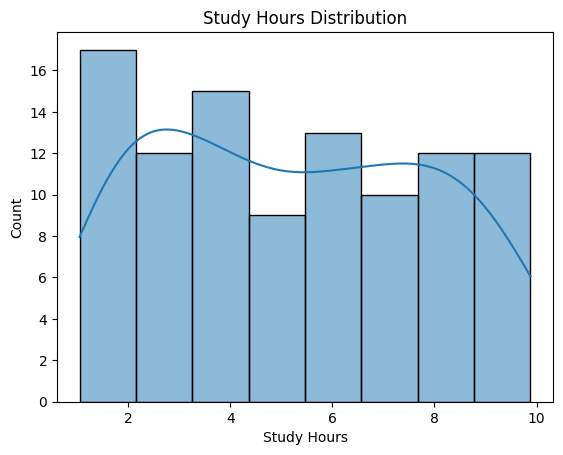

In [18]:
sns.histplot(data['Study Hours'], kde=True)
plt.title("Study Hours Distribution")
plt.show()

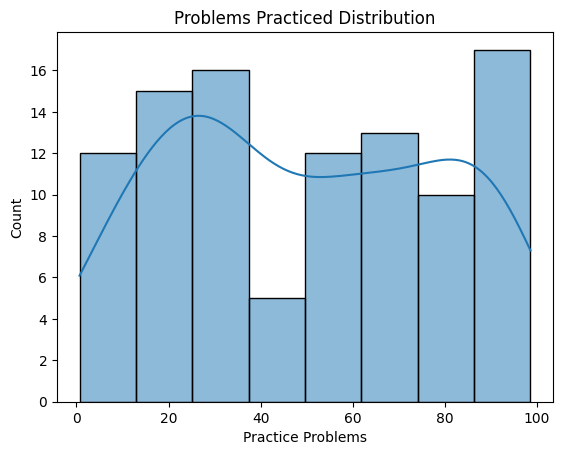

In [19]:
sns.histplot(data['Practice Problems'], kde=True)
plt.title("Problems Practiced Distribution")
plt.show()

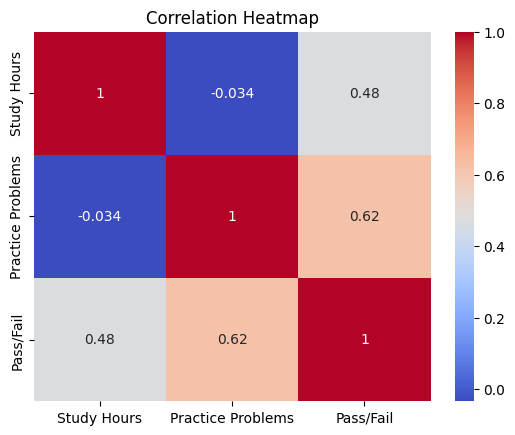

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


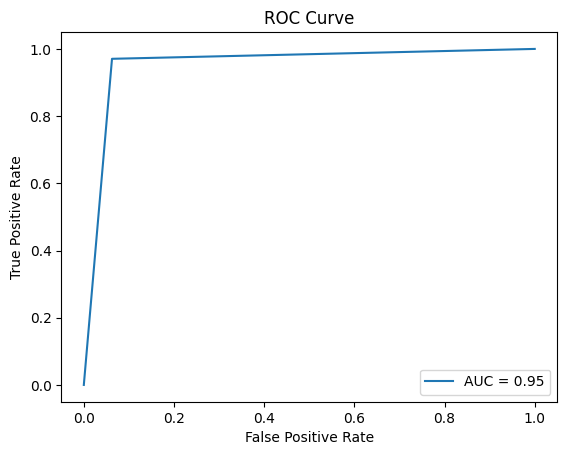

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict(X)
fpr, tpr, thresholds = roc_curve(y, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
